In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data_loic.csv',sep=",", low_memory=False)

<AxesSubplot:>

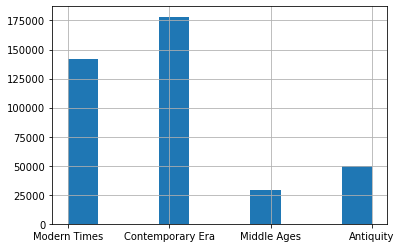

In [3]:
df['Historical Period'].hist()

In [4]:
df.shape

(399598, 55)

In [61]:
df.iloc[353376]

Object Number                                                2011.604.2.1501
Is Highlight                                                           False
Is Timeline Work                                                       False
Is Public Domain                                                        True
Object ID                                                             737191
Gallery Number                                                           NaN
Department                                               Greek and Roman Art
AccessionYear                                                           2011
Object Name                                                 Skyphos fragment
Title                      Terracotta fragment of a skyphos (deep drinkin...
Culture                                                         Greek, Attic
Period                                                             Classical
Dynasty                                                                  NaN

In [6]:
df[df['Is Public Domain']].shape

(212915, 55)

<AxesSubplot:>

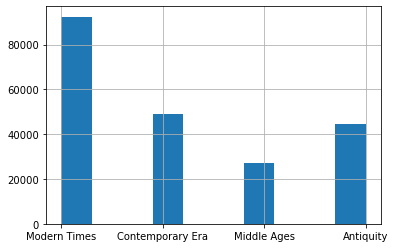

In [7]:
df[df['Is Public Domain']]['Historical Period'].hist()

In [5]:
df_images = df[df['Is Public Domain']]

In [6]:
df_antiquity = df_images[(df_images['Object ID'] > 0) & (df_images['Historical Period'] == 'Antiquity')]
df_middle_ages = df_images[(df_images['Object ID'] > 0) & (df_images['Historical Period'] == 'Middle Ages')]
df_contemporary_era = df_images[(df_images['Object ID'] > 0) & (df_images['Historical Period'] == 'Contemporary Era')]
df_modern_times = df_images[(df_images['Object ID'] > 0) & (df_images['Historical Period'] == 'Modern Times')]

In [7]:
df_antiquity = df_antiquity[["Object ID", "Historical Period"]]
df_middle_ages = df_middle_ages[["Object ID", "Historical Period"]]
df_contemporary_era = df_contemporary_era[["Object ID", "Historical Period"]]
df_modern_times = df_modern_times[["Object ID", "Historical Period"]]

In [8]:
num_samples = 1000
antiquity = df_antiquity.sample(n=num_samples, random_state=42)
middle_ages = df_middle_ages.sample(n=num_samples, random_state=42)
contemporary_era = df_contemporary_era.sample(n=num_samples, random_state=42)
modern_times = df_modern_times.sample(n=num_samples, random_state=42)

In [9]:
import os
import urllib.request
import requests

In [10]:
def save_images(folder,df):
    n = df.shape[0]
    if not os.path.exists(folder):
         os.makedirs(folder)
    os.chdir(folder)
    for i in range(n):
        Id = df.iloc[i]['Object ID']
        url = 'https://collectionapi.metmuseum.org/public/collection/v1/objects/'+str(Id)
        #r = requests.get(url)
        try:
            #urlopen(url)
            r = requests.get(url)
            url_image = r.json()['primaryImageSmall']
            name = folder+"_"+str(Id)+".jpg"
            urllib.request.urlretrieve(url_image, name)  
            r.close()
        except:
            print(i)
            pass
        """
        url_image = r.json()['primaryImageSmall']
        name = folder+"_"+str(Id)+".jpg"
        urllib.request.urlretrieve(url_image, name)  
        r.close()
        """
    os.chdir('C:\\Users\\MARY Loïc\\Desktop\\PROJET MUSEE')


In [62]:
antiquity.iloc[315]

Object ID               325698
Historical Period    Antiquity
Name: 152091, dtype: object

In [11]:
save_images("Antiquity",antiquity)
print("ok")
save_images("Middle_Ages",middle_ages)
print("ok")
save_images("Contemporary_Era",contemporary_era)
print("ok")
save_images("Modern_Times",modern_times)
print("Finish !")

314
481
630
672
710
818
ok
288
395
483
970
ok
219
620
631
665
752
909
ok
74
266
678
776
828
999
Finish !
